<a href="https://colab.research.google.com/github/JairLs/Anal-tica-de-Datos/blob/main/Actividad4_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
#Instalamos libreria para anlisis de variables categoricas
%pip install funpymodeling

In [177]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [178]:
#Cargar archivo csv
from google.colab import files
files.upload()

Saving microretailer_mit_lift_lab.xlsx to microretailer_mit_lift_lab (5).xlsx


{'microretailer_mit_lift_lab (5).xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [179]:
#Convertir en dataframe
Micro_Retailer= pd.read_excel("microretailer_mit_lift_lab.xlsx")

In [180]:
#Verificamos informacion del dataframe
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [181]:
#Imprimo los primeros 5 registros del dataframe
Micro_Retailer.head(2)

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [182]:
#Filtro por columnas
data1= Micro_Retailer.iloc[ : , [2, 3, 9, 15, 23, 24, 26, 27, 35, 36, 47, 53, 66, 72, 74, 83, 86, 87, 88, 89] ]
data1.head(5)

,_server_updated_at,_updated_by,232_type_of_store,184_store_devices,5_change_store_space_last_year,6_change_employees_average_salary_last_year,49_inventory_records,18_sales_records,210_sales_channels,189_payment_methods,214_customer_relationship_tools,193_sales_planning_tools,311_topups,45_willingness_reorder_suppliers,47_willingness_reorder_suppliers_lower_prices,277_payment_method_suppliers,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space
0,2022-11-12 22:15:10 UTC,Salomon Abdala Perez,Tailor,POS system (i.e. computer + bar code scanner +...,No cambió,No cambió,Software especializado + computadora,Software especializado + computadora,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Redes sociales,Software especializado,NaN,NaN,NaN,NaN,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0
1,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,Grocery store (aka. nanostore),Dataphone (i.e. card payments),Aumentó 15%,No cambió,No lo hago,No lo hago,WhatsApp,"Efectivo,Transferencia interbancaria",Aplicación móvil,NaN,NaN,NaN,NaN,Transferencia interbancaria,NaN,"Categoría (e.g. limpieza, aseo personal, comes...","Ofrecer un producto sustituto,Solicitar tiempo...",10%
2,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,Grocery store (aka. nanostore),"Dataphone (i.e. card payments),POS system (i.e...",No cambió,No cambió,En Excel,Software especializado + computadora,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Redes sociales,NaN,NaN,NaN,NaN,NaN,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Perder la venta,10%
3,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,Grocery store (aka. nanostore),POS system (i.e. computer + bar code scanner +...,No cambió,No cambió,Software especializado + computadora,Software especializado + computadora,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,Ninguna,NaN,NaN,NaN,NaN,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Ofrecer un producto sustituto,0
4,2022-11-12 22:15:08 UTC,Salomon Abdala Perez,Grocery store (aka. nanostore),Smartphone,No cambió,No cambió,En papel,En papel,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",NaN,NaN,NaN,NaN,NaN,NaN,Mensualmente,Venta cruzada (e.g. cereal + leche),"Informar al proveedor,Solicitar tiempo al clie...",0


In [183]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   _server_updated_at                             171 non-null    object
 1   _updated_by                                    171 non-null    object
 2   232_type_of_store                              171 non-null    object
 3   184_store_devices                              169 non-null    object
 4   5_change_store_space_last_year                 99 non-null     object
 5   6_change_employees_average_salary_last_year    85 non-null     object
 6   49_inventory_records                           110 non-null    object
 7   18_sales_records                               110 non-null    object
 8   210_sales_channels                             82 non-null     object
 9   189_payment_methods                            107 non-null    ob

In [184]:
#Identificar valores nulos por columna
valores_nulos=data1.isnull().sum()
valores_nulos

_server_updated_at                                 0
_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  2
5_change_store_space_last_year                    72
6_change_employees_average_salary_last_year       86
49_inventory_records                              61
18_sales_records                                  61
210_sales_channels                                89
189_payment_methods                               64
214_customer_relationship_tools                   76
193_sales_planning_tools                          89
311_topups                                       114
45_willingness_reorder_suppliers                  94
47_willingness_reorder_suppliers_lower_prices    102
277_payment_method_suppliers                     103
157_frequency_organize_shelves                    75
158_charact_organize_products_on_shelves          79
161_actions_stockouts                         

In [ ]:
#Sustituir valores nulos
data1["184_store_devices"] =data1["184_store_devices"].fillna("Smartphone")
data1["5_change_store_space_last_year"] =data1["5_change_store_space_last_year"].fillna(method="ffill")
data1["6_change_employees_average_salary_last_year"] =data1["6_change_employees_average_salary_last_year"].fillna("No cambió")
data1["49_inventory_records"] =data1["49_inventory_records"].fillna(method="ffill")
data1["18_sales_records"] =data1["18_sales_records"].fillna("No lo hago")
data1["210_sales_channels"] =data1["210_sales_channels"].fillna(method="ffill")
data1["189_payment_methods"] =data1["189_payment_methods"].fillna(method="ffill")
data1["214_customer_relationship_tools"] =data1["214_customer_relationship_tools"].fillna("Ninguna")
data1["193_sales_planning_tools"] =data1["193_sales_planning_tools"].fillna("Ninguna")
data1["311_topups"] =data1["311_topups"].fillna("No opino")
data1["45_willingness_reorder_suppliers"] =data1["45_willingness_reorder_suppliers"].fillna("No opino")
data1["47_willingness_reorder_suppliers_lower_prices"] =data1["47_willingness_reorder_suppliers_lower_prices"].fillna("No opino")
data1["277_payment_method_suppliers"] =data1["277_payment_method_suppliers"].fillna("Efectivo")
data1["157_frequency_organize_shelves"] =data1["157_frequency_organize_shelves"].fillna("Nunca")
data1["158_charact_organize_products_on_shelves"] =data1["158_charact_organize_products_on_shelves"].fillna(method="ffill")
data1["161_actions_stockouts"] =data1["161_actions_stockouts"].fillna(method="ffill")
data1["162_inventory_extra_space"] =data1["162_inventory_extra_space"].fillna("0")

In [186]:
#Identificar valores nulos por columna
valores_nulos=data1.isnull().sum()
valores_nulos

_server_updated_at                               0
_updated_by                                      0
232_type_of_store                                0
184_store_devices                                0
5_change_store_space_last_year                   0
6_change_employees_average_salary_last_year      0
49_inventory_records                             0
18_sales_records                                 0
210_sales_channels                               0
189_payment_methods                              0
214_customer_relationship_tools                  0
193_sales_planning_tools                         0
311_topups                                       0
45_willingness_reorder_suppliers                 0
47_willingness_reorder_suppliers_lower_prices    0
277_payment_method_suppliers                     0
157_frequency_organize_shelves                   0
158_charact_organize_products_on_shelves         0
161_actions_stockouts                            0
162_inventory_extra_space      

In [187]:
data1

,_server_updated_at,_updated_by,232_type_of_store,184_store_devices,5_change_store_space_last_year,6_change_employees_average_salary_last_year,49_inventory_records,18_sales_records,210_sales_channels,189_payment_methods,214_customer_relationship_tools,193_sales_planning_tools,311_topups,45_willingness_reorder_suppliers,47_willingness_reorder_suppliers_lower_prices,277_payment_method_suppliers,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space
0,2022-11-12 22:15:10 UTC,Salomon Abdala Perez,Tailor,POS system (i.e. computer + bar code scanner +...,No cambió,No cambió,Software especializado + computadora,Software especializado + computadora,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Redes sociales,Software especializado,No opino,No opino,No opino,Efectivo,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0
1,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,Grocery store (aka. nanostore),Dataphone (i.e. card payments),Aumentó 15%,No cambió,No lo hago,No lo hago,WhatsApp,"Efectivo,Transferencia interbancaria",Aplicación móvil,Ninguna,No opino,No opino,No opino,Transferencia interbancaria,Nunca,"Categoría (e.g. limpieza, aseo personal, comes...","Ofrecer un producto sustituto,Solicitar tiempo...",10%
2,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,Grocery store (aka. nanostore),"Dataphone (i.e. card payments),POS system (i.e...",No cambió,No cambió,En Excel,Software especializado + computadora,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Redes sociales,Ninguna,No opino,No opino,No opino,Efectivo,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Perder la venta,10%
3,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,Grocery store (aka. nanostore),POS system (i.e. computer + bar code scanner +...,No cambió,No cambió,Software especializado + computadora,Software especializado + computadora,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,Ninguna,No opino,No opino,No opino,Efectivo,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Ofrecer un producto sustituto,0
4,2022-11-12 22:15:08 UTC,Salomon Abdala Perez,Grocery store (aka. nanostore),Smartphone,No cambió,No cambió,En papel,En papel,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Ninguna,Ninguna,No opino,No opino,No opino,Efectivo,Mensualmente,Venta cruzada (e.g. cereal + leche),"Informar al proveedor,Solicitar tiempo al clie...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2022-11-03 16:50:48 UTC,Emilio Garza,Grocery store (aka. nanostore),"Analog cash register,Smartphone",Aumentó 25%,No cambió,En papel,No lo hago,WhatsApp,"Efectivo,Tarjeta de débito y/o crédito",Ninguna,Ninguna,No opino,No opino,No opino,Efectivo,Nunca,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",0
167,2022-11-03 16:28:15 UTC,Emilio Garza,Grocery store (aka. nanostore),"Analog cash register,Smartphone",Aumentó 25%,No cambió,En papel,No lo hago,WhatsApp,"Efectivo,Tarjeta de débito y/o crédito",Ninguna,Ninguna,No opino,No opino,No opino,Efectivo,Nunca,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",0
168,2022-11-03 16:28:14 UTC,Emilio Garza,Micro-restaurant (aka. fondita),Smartphone,Aumentó 25%,No cambió,En papel,No lo hago,WhatsApp,"Efectivo,Tarjeta de débito y/o crédito",Ninguna,Ninguna,No opino,No opino,No opino,Efectivo,Nunca,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",0
169,2022-11-03 16:18:37 UTC,Francisco Adán,Micro-restaurant (aka. fondita),Analog cash register,Aumentó 25%,No cambió,En papel,No lo hago,WhatsApp,"Efectivo,Tarjeta de débito y/o crédito",Ninguna,Ninguna,No opino,No opino,No opino,Efectivo,Nunca,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",0


In [188]:
#Verificamos informacion del dataframe
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   _server_updated_at                             171 non-null    object
 1   _updated_by                                    171 non-null    object
 2   232_type_of_store                              171 non-null    object
 3   184_store_devices                              171 non-null    object
 4   5_change_store_space_last_year                 171 non-null    object
 5   6_change_employees_average_salary_last_year    171 non-null    object
 6   49_inventory_records                           171 non-null    object
 7   18_sales_records                               171 non-null    object
 8   210_sales_channels                             171 non-null    object
 9   189_payment_methods                            171 non-null    ob

In [189]:
#Obtengo un analisis univariado de la variables categoricas
freq_tbl(data1)

          _server_updated_at  frequency  percentage  cumulative_perc
0    2022-11-09 23:13:46 UTC          3    0.017544         0.017544
1    2022-11-11 22:11:34 UTC          3    0.017544         0.035088
2    2022-11-09 23:13:47 UTC          3    0.017544         0.052632
3    2022-11-12 22:15:09 UTC          3    0.017544         0.070175
4    2022-11-09 23:20:41 UTC          2    0.011696         0.081871
..                       ...        ...         ...              ...
127  2022-11-10 17:34:43 UTC          1    0.005848         0.976608
128  2022-11-10 17:34:47 UTC          1    0.005848         0.982456
129  2022-11-10 17:39:04 UTC          1    0.005848         0.988304
130  2022-11-10 17:46:56 UTC          1    0.005848         0.994152
131  2022-11-03 16:15:13 UTC          1    0.005848         1.000000

[132 rows x 4 columns]

----------------------------------------------------------------

                          _updated_by  frequency  percentage  cumulative_perc
0  

In [190]:
#Obtengo un analisis univariado de una variable categorica en especifico
table1= freq_tbl(data1['_server_updated_at'])
table2= freq_tbl(data1['_updated_by'])
table3= freq_tbl(data1['232_type_of_store'])
table4= freq_tbl(data1['184_store_devices'])
table5= freq_tbl(data1['5_change_store_space_last_year'])
table6= freq_tbl(data1['6_change_employees_average_salary_last_year'])
table7= freq_tbl(data1['49_inventory_records'])
table8= freq_tbl(data1['18_sales_records'])
table9= freq_tbl(data1['210_sales_channels'])
table10= freq_tbl(data1['189_payment_methods'])
table11= freq_tbl(data1['214_customer_relationship_tools'])
table12= freq_tbl(data1['193_sales_planning_tools'])
table13= freq_tbl(data1['311_topups'])
table14= freq_tbl(data1['45_willingness_reorder_suppliers'])
table15= freq_tbl(data1['47_willingness_reorder_suppliers_lower_prices'])
table16= freq_tbl(data1['277_payment_method_suppliers'])
table17= freq_tbl(data1['157_frequency_organize_shelves'])
table18= freq_tbl(data1['158_charact_organize_products_on_shelves'])
table19= freq_tbl(data1['161_actions_stockouts'])
table20= freq_tbl(data1['162_inventory_extra_space'])

In [191]:
#Obtengo un filtro de los valores mas relevnates de las varibales categorias seleccionadas
Filtro1 = table1[table1['frequency'] > 1]
Filtro2 = table2[table2['frequency'] > 1]
Filtro3 = table3[table3['frequency'] > 1]
Filtro4 = table4[table4['frequency'] > 1]
Filtro5 = table5[table5['frequency'] > 1]
Filtro6 = table6[table6['frequency'] > 1]
Filtro7 = table7[table7['frequency'] > 1]
Filtro8 = table8[table8['frequency'] > 1]
Filtro9 = table9[table9['frequency'] > 1]
Filtro10 = table10[table10['frequency'] > 1]
Filtro11 = table11[table11['frequency'] > 1]
Filtro12 = table12[table12['frequency'] > 1]
Filtro13 = table13[table13['frequency'] > 1]
Filtro14 = table14[table14['frequency'] > 1]
Filtro15 = table15[table15['frequency'] > 1]
Filtro16 = table16[table16['frequency'] > 1]
Filtro17 = table17[table17['frequency'] > 1]
Filtro18 = table18[table18['frequency'] > 1]
Filtro19 = table19[table19['frequency'] > 1]
Filtro20 = table20[table20['frequency'] > 1]

In [192]:
#Ajusto el indice de el dataframe
Filtro_index1 = Filtro1.set_index('_server_updated_at')
Filtro_index2 = Filtro2.set_index('_updated_by')
Filtro_index3 = Filtro3.set_index('232_type_of_store')
Filtro_index4 = Filtro4.set_index('184_store_devices')
Filtro_index5 = Filtro5.set_index('5_change_store_space_last_year')
Filtro_index6 = Filtro6.set_index('6_change_employees_average_salary_last_year')
Filtro_index7 = Filtro7.set_index('49_inventory_records')
Filtro_index8 = Filtro8.set_index('18_sales_records')
Filtro_index9 = Filtro9.set_index('210_sales_channels')
Filtro_index10 = Filtro10.set_index('189_payment_methods')
Filtro_index11 = Filtro11.set_index('214_customer_relationship_tools')
Filtro_index12 = Filtro12.set_index('193_sales_planning_tools')
Filtro_index13 = Filtro13.set_index('311_topups')
Filtro_index14 = Filtro14.set_index('45_willingness_reorder_suppliers')
Filtro_index15 = Filtro15.set_index('47_willingness_reorder_suppliers_lower_prices')
Filtro_index16 = Filtro16.set_index('277_payment_method_suppliers')
Filtro_index17 = Filtro17.set_index('157_frequency_organize_shelves')
Filtro_index18 = Filtro18.set_index('158_charact_organize_products_on_shelves')
Filtro_index19 = Filtro19.set_index('161_actions_stockouts')
Filtro_index20 = Filtro20.set_index('162_inventory_extra_space')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

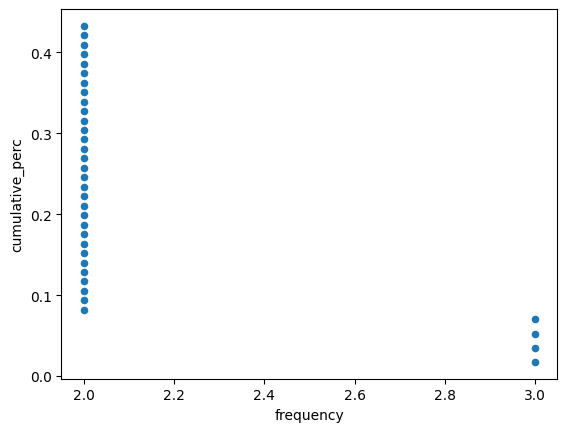

In [193]:
Filtro_index1.plot('frequency','cumulative_perc',kind='scatter')

<Axes: ylabel='frequency'>

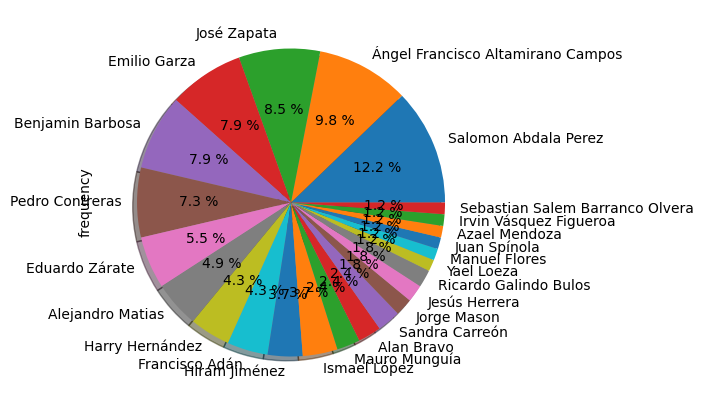

In [194]:
Filtro_index2['frequency'].plot(kind='pie',figsize=(10,5), shadow=True, autopct='%0.1f %%')

<Axes: ylabel='frequency'>

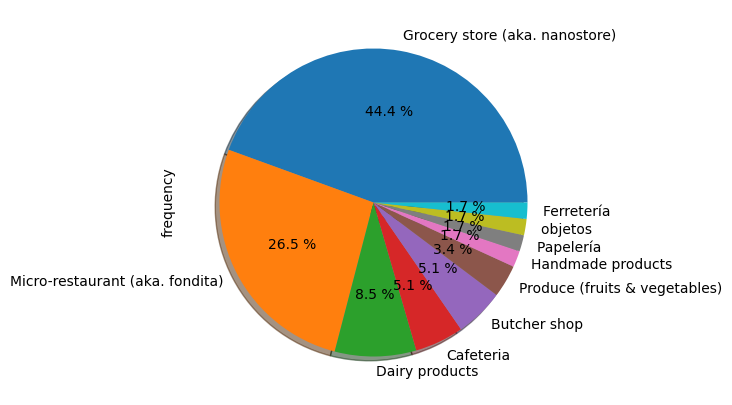

In [195]:
Filtro_index3['frequency'].plot(kind='pie',figsize=(10,5), shadow=True, autopct='%0.1f %%')

<Axes: xlabel='184_store_devices'>

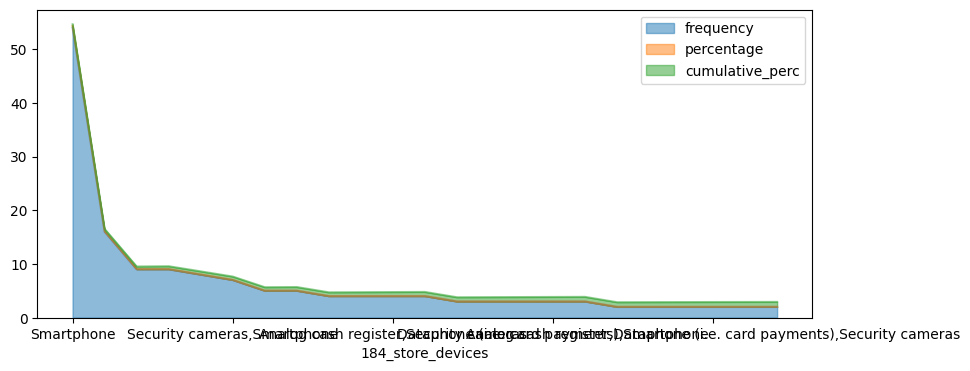

In [196]:
Filtro_index4.plot(kind='area', figsize=(10,4),alpha=0.5)

<Axes: xlabel='5_change_store_space_last_year'>

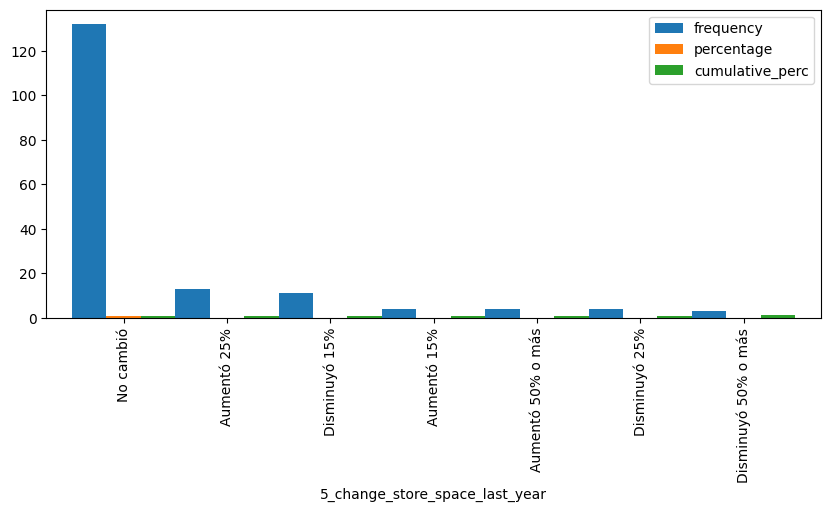

In [197]:
Filtro_index5.plot(kind='bar',width=1,figsize=(10,4))

<Axes: xlabel='6_change_employees_average_salary_last_year'>

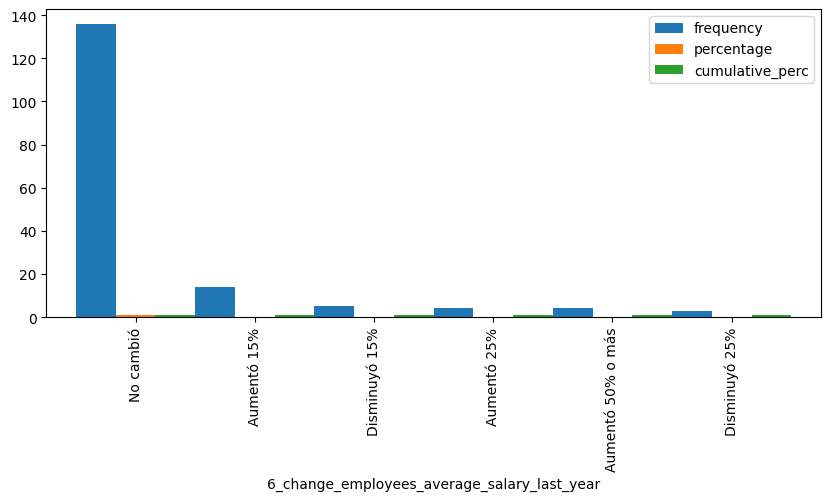

In [198]:
Filtro_index6.plot(kind='bar',width=1,figsize=(10,4))

<Axes: ylabel='frequency'>

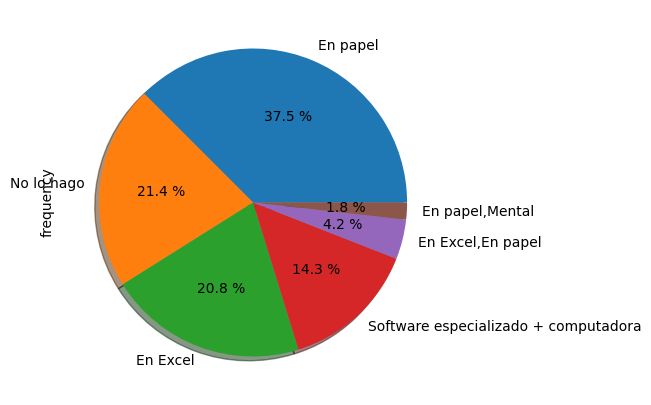

In [199]:
Filtro_index7['frequency'].plot(kind='pie',figsize=(10,5), shadow=True, autopct='%0.1f %%')

<Axes: xlabel='18_sales_records'>

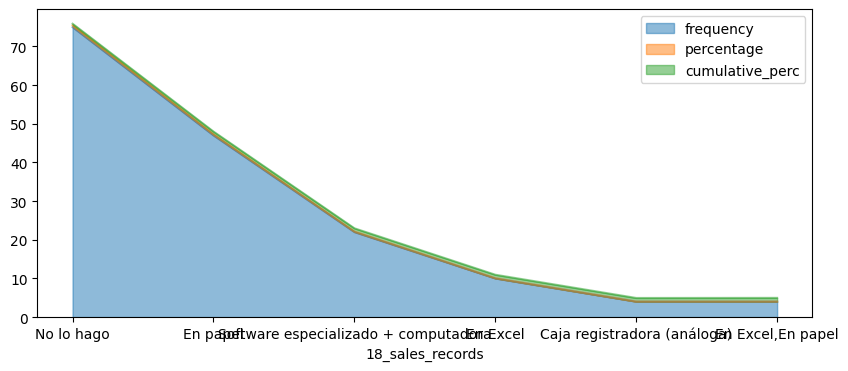

In [200]:
Filtro_index8.plot(kind='area', figsize=(10,4),alpha=0.5)

<Axes: ylabel='frequency'>

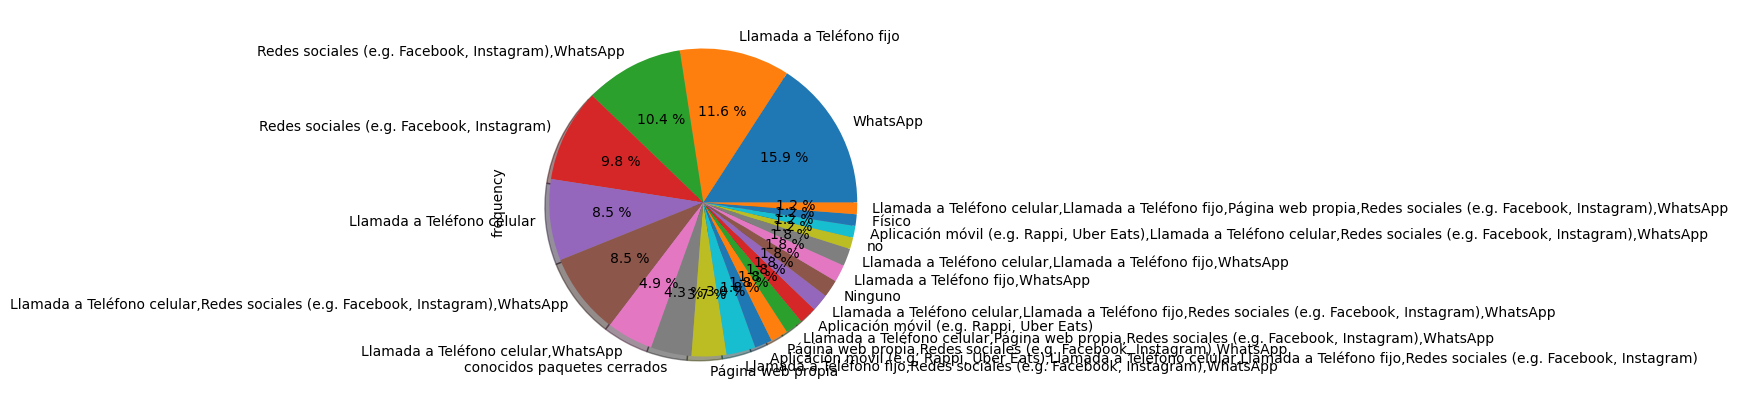

In [201]:
Filtro_index9['frequency'].plot(kind='pie',figsize=(10,5), shadow=True, autopct='%0.1f %%')

<Axes: ylabel='frequency'>

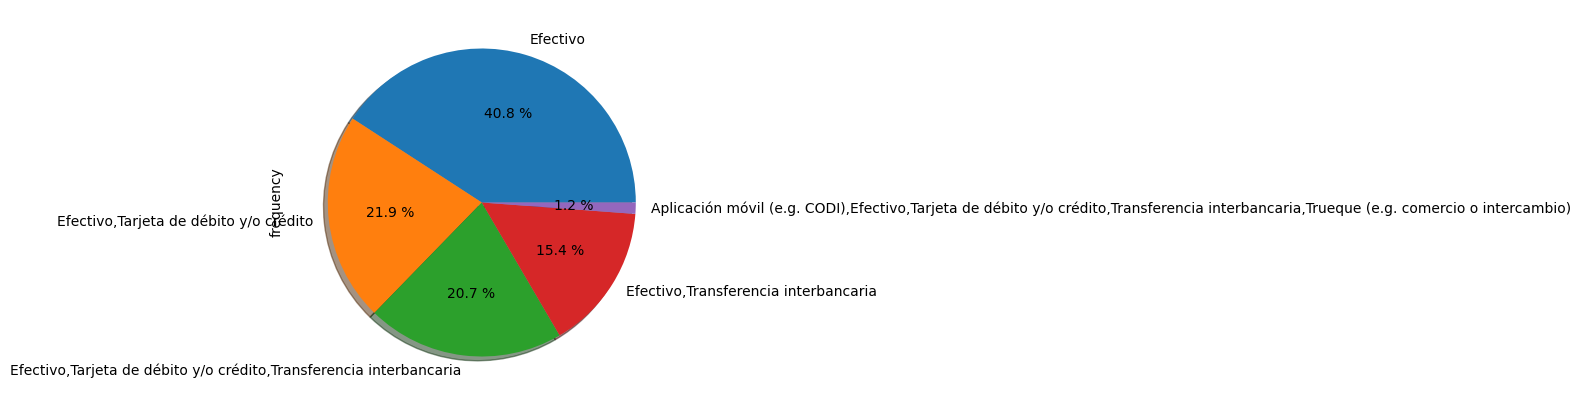

In [202]:
Filtro_index10['frequency'].plot(kind='pie',figsize=(10,5), shadow=True, autopct='%0.1f %%')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

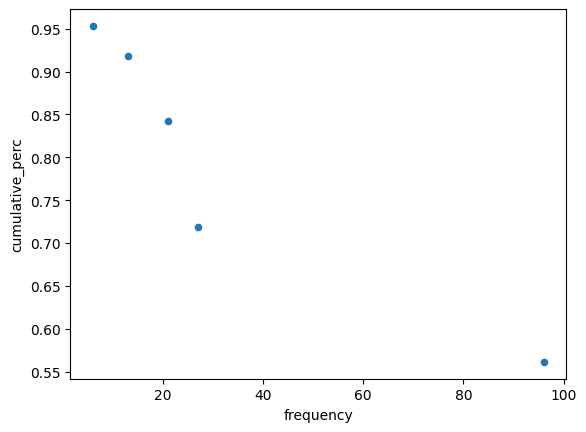

In [203]:
Filtro_index11.plot('frequency','cumulative_perc',kind='scatter')

<Axes: xlabel='193_sales_planning_tools'>

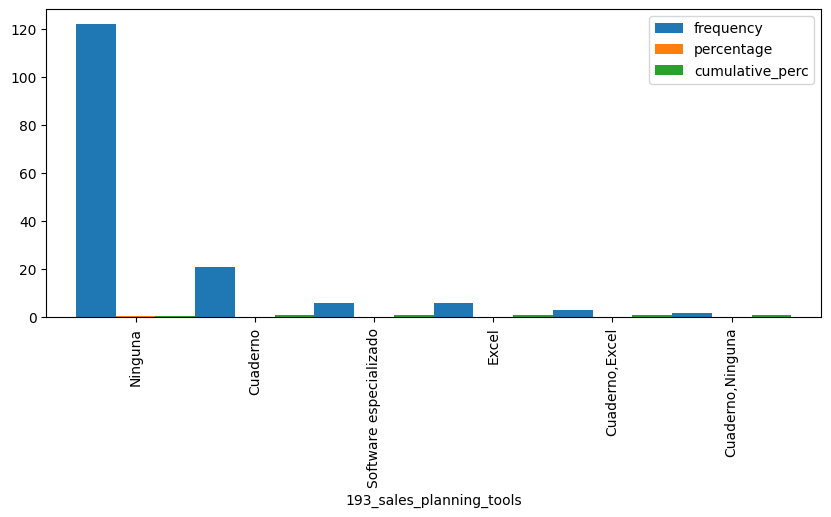

In [204]:
Filtro_index12.plot(kind='bar',width=1,figsize=(10,4))

<Axes: ylabel='frequency'>

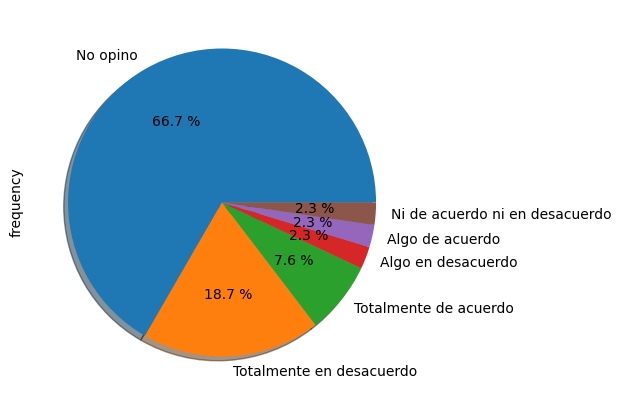

In [205]:
Filtro_index13['frequency'].plot(kind='pie',figsize=(10,5), shadow=True, autopct='%0.1f %%')

<Axes: xlabel='45_willingness_reorder_suppliers'>

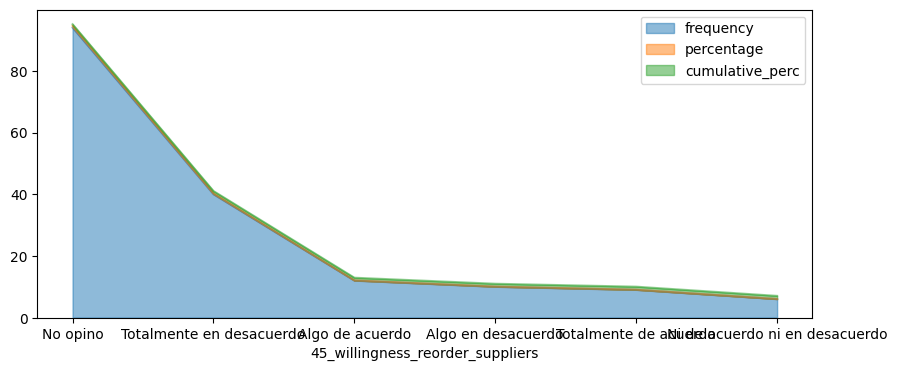

In [206]:
Filtro_index14.plot(kind='area', figsize=(10,4),alpha=0.5)

<Axes: xlabel='47_willingness_reorder_suppliers_lower_prices'>

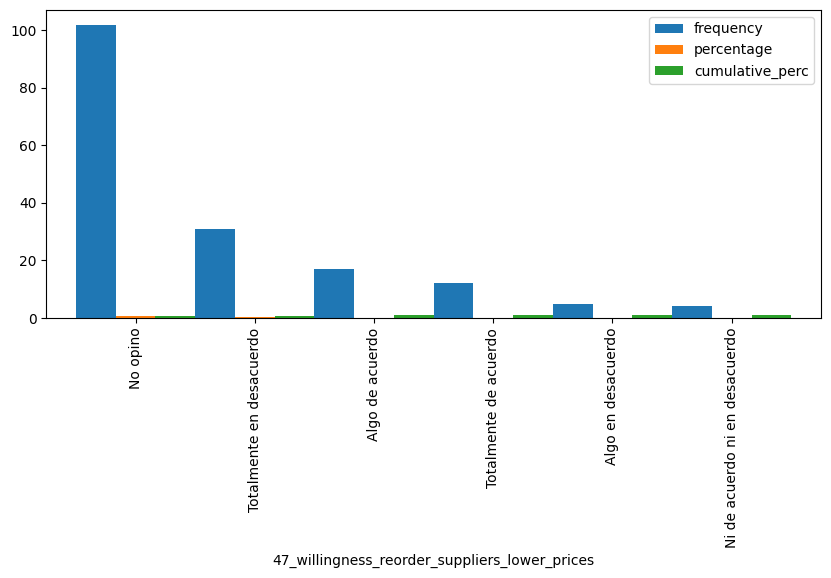

In [207]:
Filtro_index15.plot(kind='bar',width=1,figsize=(10,4))

<Axes: xlabel='277_payment_method_suppliers'>

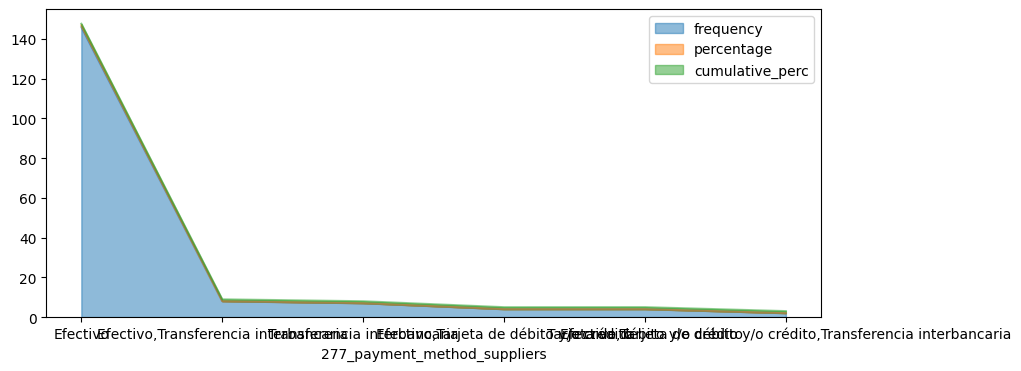

In [208]:
Filtro_index16.plot(kind='area', figsize=(10,4),alpha=0.5)

<Axes: ylabel='frequency'>

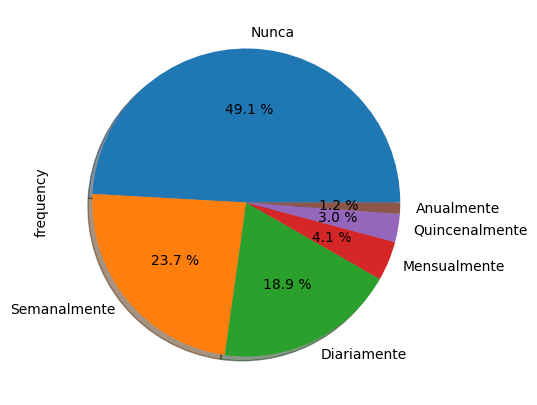

In [209]:
Filtro_index17['frequency'].plot(kind='pie',figsize=(10,5), shadow=True, autopct='%0.1f %%')

<Axes: xlabel='158_charact_organize_products_on_shelves'>

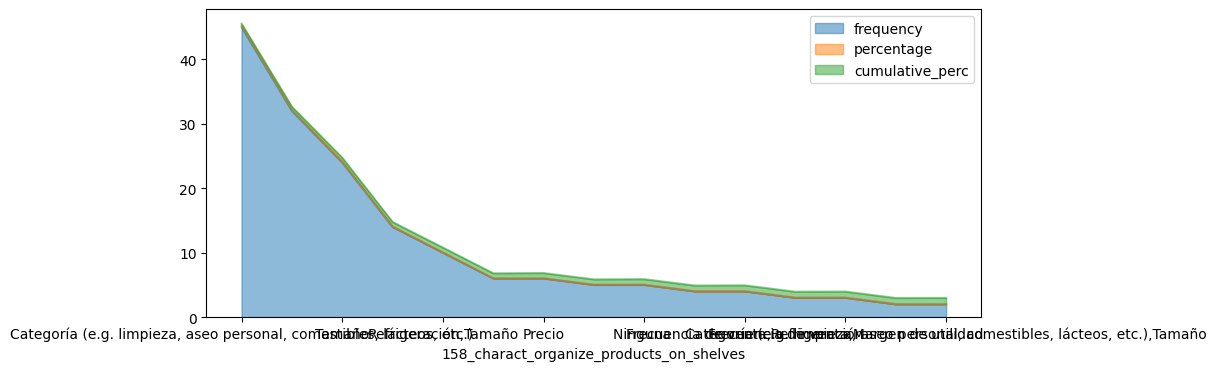

In [210]:
Filtro_index18.plot(kind='area', figsize=(10,4),alpha=0.5)

<Axes: ylabel='frequency'>

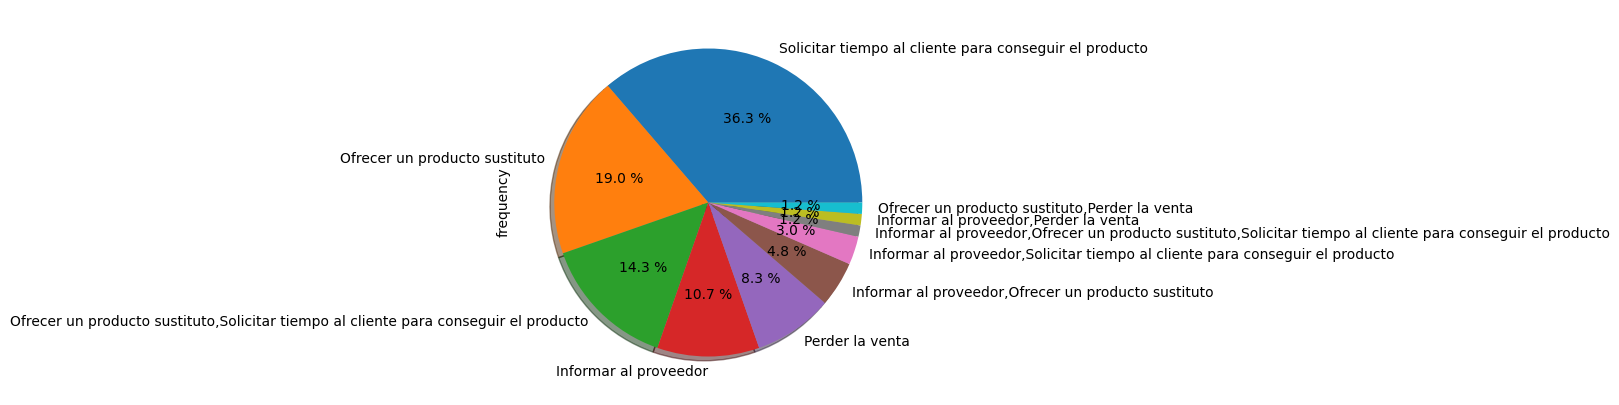

In [211]:
Filtro_index19['frequency'].plot(kind='pie',figsize=(10,5), shadow=True, autopct='%0.1f %%')

<Axes: xlabel='162_inventory_extra_space'>

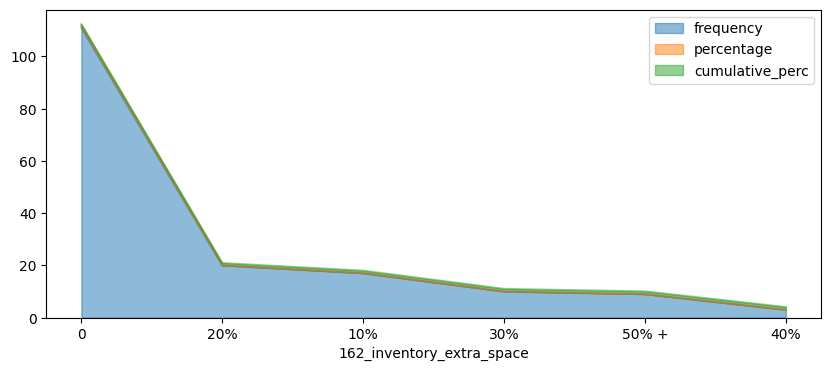

In [212]:
Filtro_index20.plot(kind='area', figsize=(10,4),alpha=0.5)